# PhysRevA.96.022128 - Figura 8
Positron yield and energy as functions of (E0,I21)

In [2]:
# import API
import pwpp
from pwpp import *

In [36]:
tau = 30;
lbd = 1;
xlst = np.logspace(log10(0.5),log10(5),40);
ylst = np.logspace(log10(1),log10(100),40);
X,Y = np.meshgrid(xlst,ylst);
Np1 = np.zeros_like(X)
Np2 = np.zeros_like(X)
def fun1(E0,I21): return Np(E0/m, 0.855*sqrt(I21*1e21/1e18)*lbd, c/(lbd*1e-6)*hbar/e*1e-9, tau*c/(lbd*1e-6)*1e-15);
def fun2(E0,I21): return m*gp(E0/m, 0.855*sqrt(I21*1e21/1e18)*lbd, c/(lbd*1e-6)*hbar/e*1e-9, tau*c/(lbd*1e-6)*1e-15);
for i in range(len(xlst)):
    for j in range(len(ylst)):
        E0 = xlst[i]
        I21 = ylst[j]
        Np1[i,j] = fun1(E0,I21)
        Np2[i,j] = fun2(E0,I21)

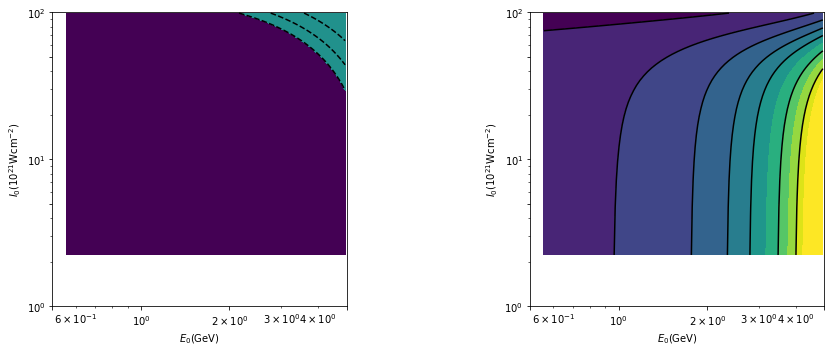

In [46]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,5))
fnt = 16

axes[0].contour(np.log10(Np1.T), [-8,-6,-4,-3,-2,-1,0], colors = 'k', origin='lower', extent=[min(xlst), max(xlst), min(ylst), max(ylst)] )
im0 = axes[0].contourf(np.log10(Np1.T), 15, origin='lower', extent=[min(xlst), max(xlst), min(ylst), max(ylst)],vmin=-8, vmax=0 )
axes[0].set_xlabel(r'$E_0(\mathrm{GeV})$')
axes[0].set_ylabel(r'$I_0(10^{21} \mathrm{W cm}^{-2})$')
axes[0].set_xlim([np.min(xlst),np.max(xlst)])
axes[0].set_ylim([np.min(ylst),np.max(ylst)])
axes[0].set_xscale('log')
axes[0].set_yscale('log')
axes[0].set_xticks([0.500,1.000,2.000,5.000])
axes[0].set_yticks([1,5,10,50,100])

axes[1].contour(1000*Np2.T, [100,200,300,400,500,700,900], colors = 'k', origin='lower', extent=[min(xlst), max(xlst), min(ylst), max(ylst)] )
im1 = axes[1].contourf(1000*Np2.T, 15, origin='lower', extent=[min(xlst), max(xlst), min(ylst), max(ylst)] , vmin=50, vmax=1000)
axes[1].set_xlabel(r'$E_0(\mathrm{GeV})$')
axes[1].set_ylabel(r'$I_0(10^{21} \mathrm{W cm}^{-2})$')
axes[1].set_xlim([np.min(xlst),np.max(xlst)])
axes[1].set_ylim([np.min(ylst),np.max(ylst)])
axes[1].set_xscale('log')
axes[1].set_yscale('log')
axes[1].set_xticks([0.500,1.000,2.000,5.000])
axes[1].set_yticks([1,5,10,50,100])

# aspect
for i in range(2):
    xmin, xmax = axes[i].get_xlim()
    ymin, ymax = axes[i].get_ylim()
    axesratio = (np.log10(ymax)-np.log10(ymin))/(np.log10(xmax)-np.log10(xmin))
    #axesratio = (ymax-ymin)/(xmax-xmin)
    axes[i].set_aspect(aspect=1/axesratio)

# final
plt.tight_layout()
plt.show()